In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_linear_constraint(name, A, b, lb, ub):
    """
    Plot in form A*v - b
    where v = [x; y]

    Lower bound: x is light red, y is dark red
    Upper bound: x is light green, y is dark green
    """
    lower_x, lower_y = lb
    upper_x, upper_y = ub
    count = 3
    ones = np.ones(count)
    x_span = np.linspace(lower_x, upper_x, count)
    y_span = np.linspace(lower_y, upper_y, count)

    def plot_line(vs, color):
        ws = (A @ vs).T - b
        wxs, wys = ws.T
        plt.plot(wxs, wys, color)

    lower_x_line = np.array([x_span, ones * lower_y])
    plot_line(lower_x_line, "salmon")
    lower_y_line = np.array([ones * lower_x, y_span])
    plot_line(lower_y_line, "firebrick")
    upper_x_line = np.array([x_span, ones * upper_y])
    plot_line(upper_x_line, "limegreen")
    upper_y_line = np.array([ones * upper_x, y_span])
    plot_line(upper_y_line, "darkgreen")

    plt.xlabel(f"${name}_1$")
    plt.ylabel(f"${name}_2$")

Show vanilla bounding box constraint for $x \in R^2$, $x_i \in [-1, 1]$

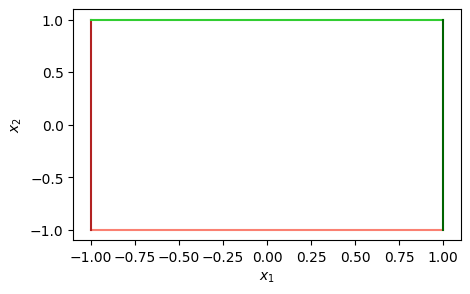

In [3]:
plt.figure(figsize=(5, 3))
plot_linear_constraint("x", np.eye(2), np.zeros(2), -np.ones(2), np.ones(2))

In [4]:
def rot(th):
    c = np.cos(th)
    s = np.sin(th)
    return np.array([
        [c, -s],
        [s, c],
    ])

Make a "fake" Jacobian of $N = \text{rot}(\theta)$, where $N^\dag = N^T$

In [5]:
N = rot(np.deg2rad(105.0))
b_qdot = np.zeros(2)
lower_qdot = -np.ones(2)
upper_qdot = np.ones(2)

Nplus = N.T
b_v = Nplus @ b_qdot
lower_v = Nplus @ (lower_qdot + b_qdot)
upper_v = Nplus @ (upper_qdot + b_qdot)

First show linear constraint on $\dot{q}$, using $v$ as decision variable.

Then reproject to bounding box constraint on $v$; however, note that there is
a flip between lower and upper bounds on $v$

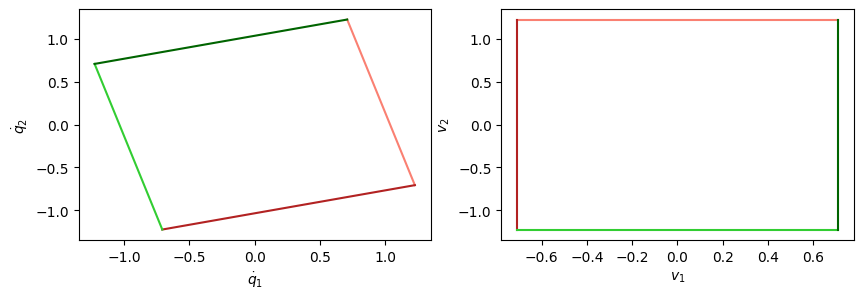

In [6]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.sca(axs[0])
plot_linear_constraint(r"\dot{q}", N, b_qdot, lower_qdot, upper_qdot)
plt.sca(axs[1])
plot_linear_constraint("v", np.eye(2), np.zeros(2), lower_v, upper_v)